In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df= pd.read_csv('C:/Users/HP/Desktop/ds_basic_cls/Churn History Dataset.csv')
dataset = df

In [3]:
dataset.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Y_var
0,KS,128,415,382-4657,no,yes,25,265.1,110.0,45.07,...,99,16.78,244.7,91.0,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123.0,27.47,...,103,16.62,254.4,103.0,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114.0,41.38,...,110,10.30,162.6,104.0,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,7100.0,1500.90,...,88,5.26,196.9,89.0,8.86,600.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113.0,28.34,...,122,12.61,186.9,121.0,8.41,10.1,3,2.73,3,False.


## Exploratory Data analysis 

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   object 
 1   account length                 3333 non-null   int64  
 2   area code                      3333 non-null   int64  
 3   phone number                   3333 non-null   object 
 4   international plan             3333 non-null   object 
 5   voice mail plan                3333 non-null   object 
 6   number vmail messages          3333 non-null   int64  
 7   total day minutes              3333 non-null   float64
 8   total day calls                3332 non-null   float64
 9   total day charge               3332 non-null   float64
 10  total eve minutes              3331 non-null   float64
 11  total eve calls                3333 non-null   int64  
 12  total eve charge               3332 non-null   f

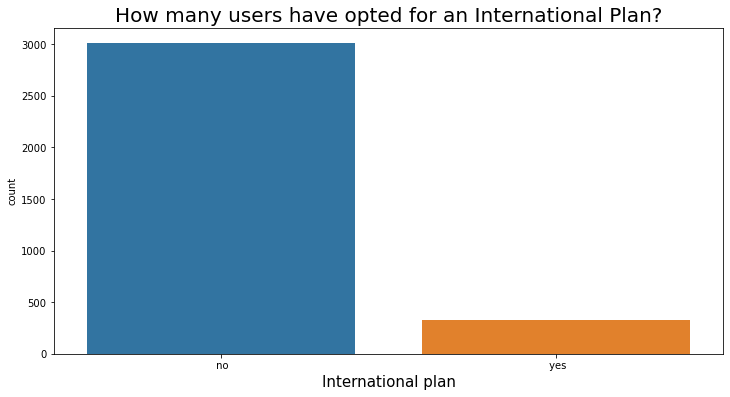

In [5]:
plt.figure(figsize = (12,6))
sns.countplot(data = dataset, x = 'international plan')
plt.xlabel('International plan', fontsize = 15)
plt.title('How many users have opted for an International Plan?', fontsize = 20)
plt.show()

**Findings->
We can see that not many users opt for International plans.**

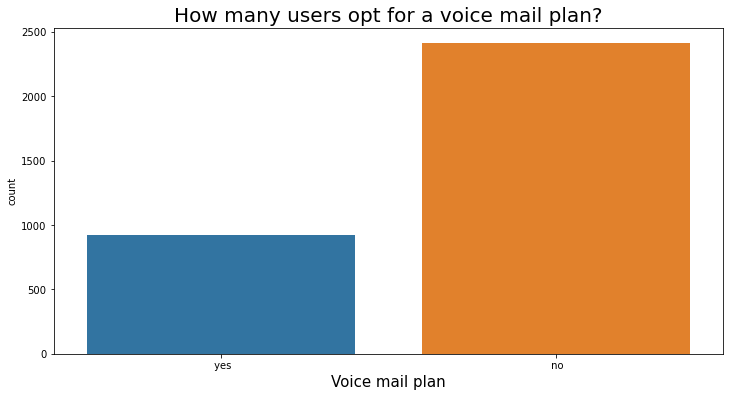

In [6]:
plt.figure(figsize = (12,6))
sns.countplot(data = dataset, x = 'voice mail plan')
plt.xlabel('Voice mail plan', fontsize = 15)
plt.title('How many users opt for a voice mail plan?', fontsize = 20)
plt.show()

**Many users do not opt for a voice mail plan**

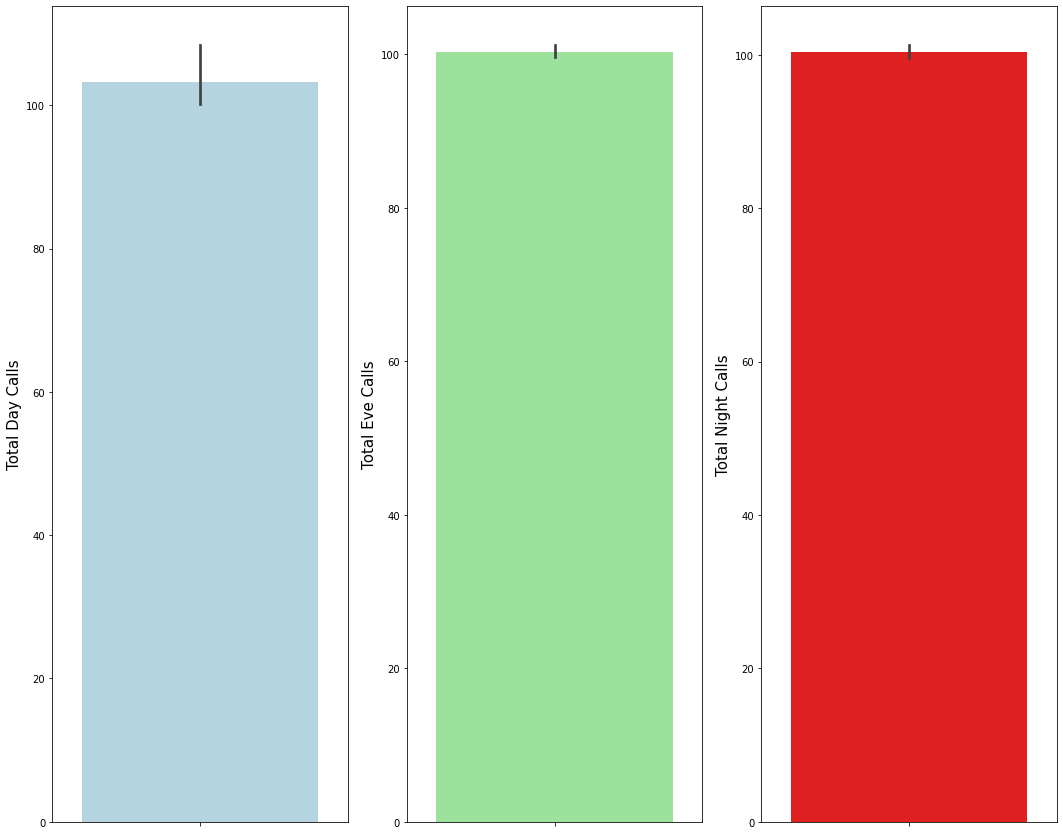

In [7]:
plt.figure(figsize = (18,15))
plt.subplot(1,3,1)
sns.barplot(data=dataset, y = 'total day calls', color = 'lightblue')
plt.ylabel('Total Day Calls', fontsize = 15)

plt.subplot(1,3,2)
sns.barplot(data = dataset, y = 'total eve calls', color = 'lightgreen')
plt.ylabel('Total Eve Calls', fontsize = 15)

plt.subplot(1,3,3)
sns.barplot(data=dataset, y = 'total night calls', color = 'red')
plt.ylabel('Total Night Calls', fontsize = 15)

plt.show()

**We can see that more calls are made in the morning**

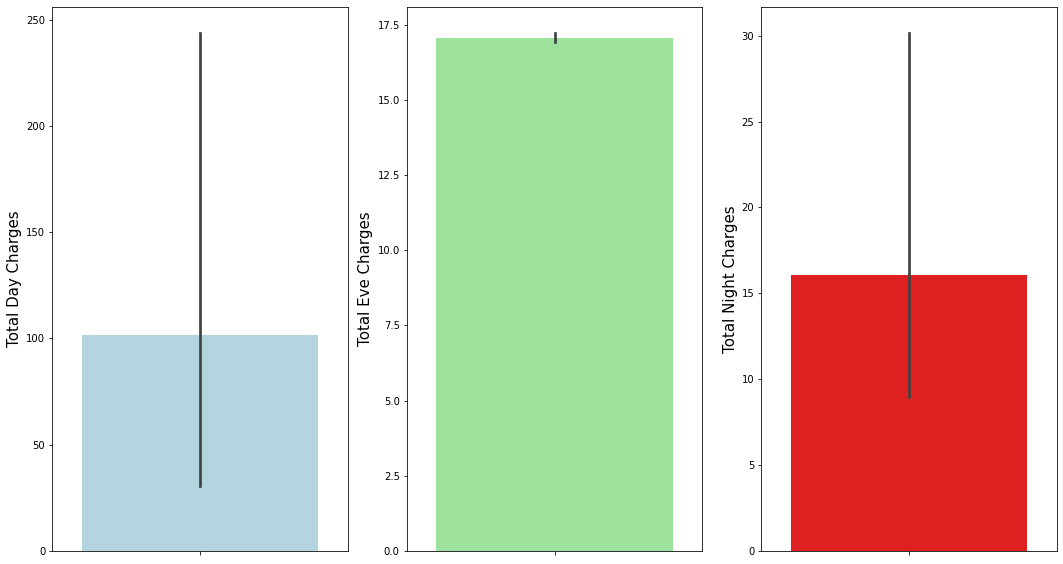

In [8]:
plt.figure(figsize = (18,10))
plt.subplot(1,3,1)
sns.barplot(data=dataset, y = 'total day charge', color = 'lightblue')
plt.ylabel('Total Day Charges', fontsize = 15)

plt.subplot(1,3,2)
sns.barplot(data = dataset, y = 'total eve charge', color = 'lightgreen')
plt.ylabel('Total Eve Charges', fontsize = 15)

plt.subplot(1,3,3)
sns.barplot(data=dataset, y = 'total night charge', color = 'red')
plt.ylabel('Total Night Charges', fontsize = 15)

plt.show()


**The charges are maximum in the evening time and lowest in the night time.**

In [9]:
from sklearn.preprocessing import LabelEncoder as le
data1=dataset.copy()
data1['international plan']=le().fit_transform(data1['international plan'])
data1['voice mail plan']=le().fit_transform(data1['voice mail plan'])
data1['Y_var']=le().fit_transform(data1['Y_var'])

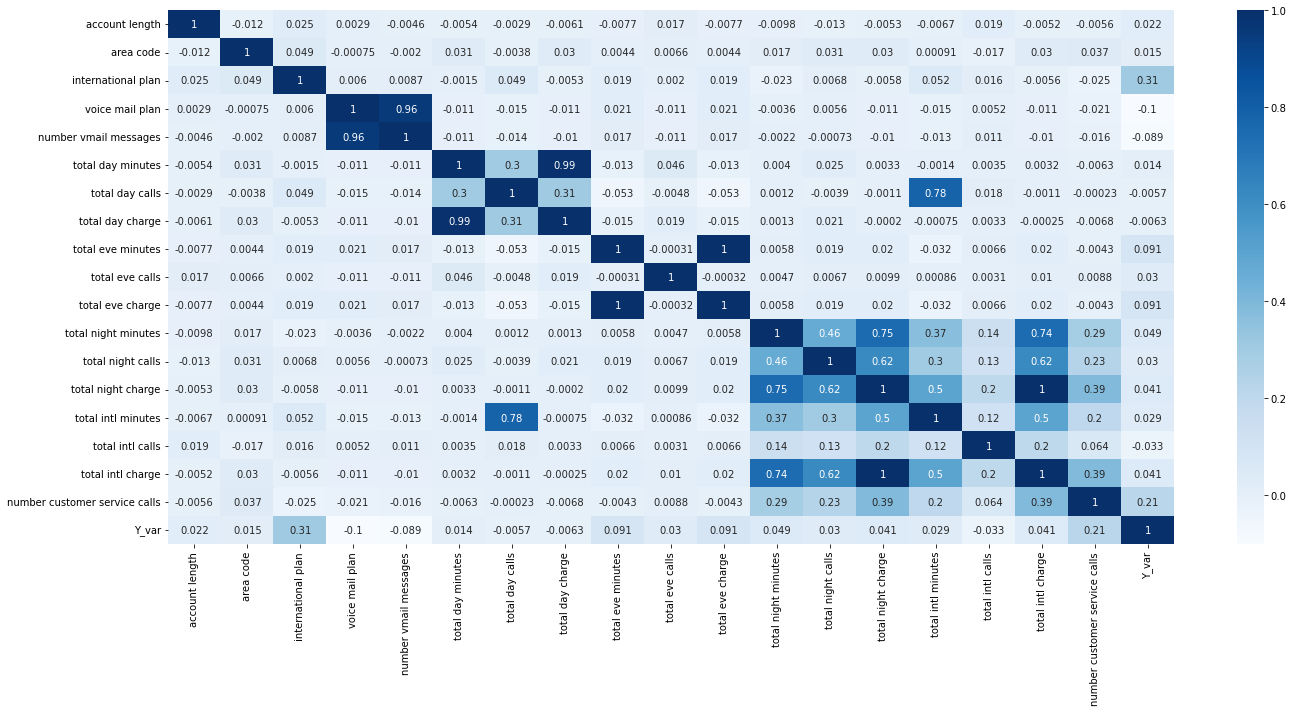

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(data1.corr(),cbar=True,annot=True,cmap='Blues')
plt.tight_layout()
plt.show()


**we need to drop phone number and state as they are not important and It can skew our analysis.**

**Several of the numerical data are very correlated. (Total day minutes and Total day charge), (Total eve minutes and Total eve charge), (Total night minutes and Total night charge) and lastly (Total intl minutes and Total intl charge) are alo correlated. We only have to select one of them.**

In [12]:
l = list(data1.columns)

In [13]:
print(l)

['state', 'account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'number customer service calls', 'Y_var']


In [14]:
dataset = data1.drop(columns=['state', 'area code', 'phone number','total day charge', 'total eve charge', 
               'total night charge', 'total intl charge'])
dataset.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,number customer service calls,Y_var
0,128,0,1,25,265.1,110.0,197.4,99,244.7,91.0,10.0,3,1,0
1,107,0,1,26,161.6,123.0,195.5,103,254.4,103.0,13.7,3,1,0
2,137,0,0,0,243.4,114.0,121.2,110,162.6,104.0,12.2,5,0,0
3,84,1,0,0,299.4,7100.0,61.9,88,196.9,89.0,600.6,7,2,0
4,75,1,0,0,166.7,113.0,148.3,122,186.9,121.0,10.1,3,3,0


In [15]:
data = dataset.dropna()

In [16]:
X_train = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [17]:
print(X_train)

[[128.    0.    1.  ...  10.    3.    1. ]
 [107.    0.    1.  ...  13.7   3.    1. ]
 [137.    0.    0.  ...  12.2   5.    0. ]
 ...
 [ 28.    0.    0.  ...  14.1   6.    2. ]
 [184.    1.    0.  ...   5.   10.    2. ]
 [ 74.    0.    1.  ...  13.7   4.    0. ]]


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)

In [19]:
print(X_train_scaled)

[[ 0.67647744 -0.32718171  1.61607972 ... -0.0427813  -0.59221318
  -0.4005848 ]
 [ 0.14886125 -0.32718171  1.61607972 ...  0.25937311 -0.59221318
  -0.4005848 ]
 [ 0.90259866 -0.32718171 -0.61878136 ...  0.13687808  0.20329706
  -1.09971865]
 ...
 [-1.83598059 -0.32718171 -0.61878136 ...  0.29203845  0.60105219
   0.29854905]
 [ 2.08345393  3.05640555 -0.61878136 ... -0.45109807  2.19207268
   0.29854905]
 [-0.6802499  -0.32718171  1.61607972 ...  0.25937311 -0.19445806
  -1.09971865]]


In [20]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 1)
classifier1.fit(X_train_scaled,y)


LogisticRegression(random_state=1)

In [21]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier2.fit(X_train, y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [22]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 2)
classifier3.fit(X_train, y)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=2)

In [23]:
data2= pd.read_csv('C:/Users/HP/Desktop/ds_basic_cls/Churn Test Dataset.csv')

In [24]:
data2.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn Indicator
0,HI,101,510,354-8814,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,False.
1,MT,137,510,381-7210,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,False.
2,OH,103,408,411-9480,yes,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,False.
3,NM,99,415,418-9103,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,False.
4,SC,108,415,413-3646,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,False.


In [25]:
data2 = data2.drop(columns=['state', 'area code','phone number', 'total day charge', 'total eve charge', 
               'total night charge', 'total intl charge'])
data2.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,number customer service calls,Churn Indicator
0,101,no,no,0,70.9,123,211.9,73,236.0,73,10.6,3,3,False.
1,137,no,no,0,223.6,86,244.8,139,94.2,81,9.5,7,0,False.
2,103,yes,yes,29,294.7,95,237.3,105,300.3,127,13.7,6,1,False.
3,99,no,no,0,216.8,123,126.4,88,220.6,82,15.7,2,1,False.
4,108,no,no,0,197.4,78,124.0,101,204.5,107,7.7,4,2,False.


In [26]:
from sklearn.preprocessing import LabelEncoder as le
data=data2.copy()
data['international plan']=le().fit_transform(data['international plan'])
data['voice mail plan']=le().fit_transform(data['voice mail plan'])
data['Churn Indicator']=le().fit_transform(data['Churn Indicator'])

In [27]:
data.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,number customer service calls,Churn Indicator
0,101,0,0,0,70.9,123,211.9,73,236.0,73,10.6,3,3,0
1,137,0,0,0,223.6,86,244.8,139,94.2,81,9.5,7,0,0
2,103,1,1,29,294.7,95,237.3,105,300.3,127,13.7,6,1,0
3,99,0,0,0,216.8,123,126.4,88,220.6,82,15.7,2,1,0
4,108,0,0,0,197.4,78,124.0,101,204.5,107,7.7,4,2,0


In [28]:
data=data.dropna()
X_test = data.iloc[:, :-1].values
yt = data.iloc[:, -1].values

In [29]:
X_test_scaled = sc.transform(X_test)

In [30]:
print(X_test_scaled)

[[-1.88622975e-03 -3.27181712e-01 -6.18781355e-01 ...  6.21671477e-03
  -5.92213183e-01  9.97682901e-01]
 [ 9.02598658e-01 -3.27181712e-01 -6.18781355e-01 ... -8.36129744e-02
   9.98807309e-01 -1.09971865e+00]
 [ 4.83629307e-02  3.05640555e+00  1.61607972e+00 ...  2.59373112e-01
   6.01052186e-01 -4.00584801e-01]
 ...
 [ 1.63121148e+00 -3.27181712e-01  1.61607972e+00 ...  3.88820563e-02
  -9.89968307e-01 -4.00584801e-01]
 [-8.05872796e-01 -3.27181712e-01 -6.18781355e-01 ... -3.61268377e-01
   6.01052186e-01  9.97682901e-01]
 [ 3.24733313e-01 -3.27181712e-01 -6.18781355e-01 ...  3.88820563e-02
   2.03297063e-01  2.98549050e-01]]


In [31]:
y_pred = classifier1.predict(X_test_scaled)

In [32]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), yt.reshape(len(yt),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 1]
 [0 1]
 [0 1]]


In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(yt, y_pred)
print(cm)
accuracy_score(yt, y_pred)

[[1389   43]
 [ 191   49]]


0.8600478468899522

In [34]:
y_pred = classifier2.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), yt.reshape(len(yt),1)),1))

[[0 0]
 [0 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [1 1]]


In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(yt, y_pred)
print(cm)
accuracy_score(yt, y_pred)

[[1366   66]
 [  81  159]]


0.9120813397129187

In [36]:
y_pred = classifier3.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), yt.reshape(len(yt),1)),1))

[[0 0]
 [0 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(yt, y_pred)
print(cm)
accuracy_score(yt, y_pred)

[[1418   14]
 [ 108  132]]


0.9270334928229665

In [38]:
importance = classifier3.feature_importances_

In [39]:
features = list(data.columns)
features = features[:-1]
features

['account length',
 'international plan',
 'voice mail plan',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total eve minutes',
 'total eve calls',
 'total night minutes',
 'total night calls',
 'total intl minutes',
 'total intl calls',
 'number customer service calls']

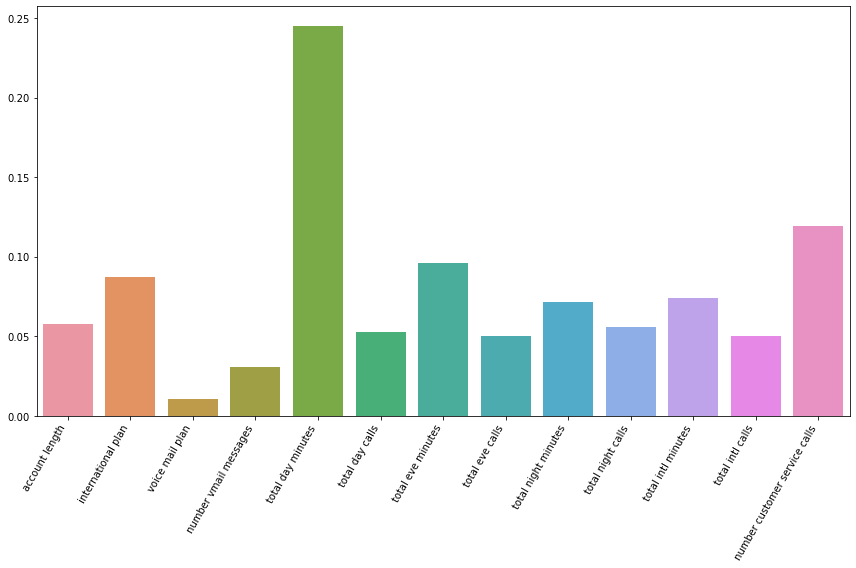

In [45]:
plt.figure(figsize=(12,8))
p=sns.barplot(x=features,y=importance)
p.set_xticklabels(p.get_xticklabels(),rotation=60,ha='right')
plt.tight_layout()
plt.show()

**I.'total day minutes', 'number customer service calls' and 'total evening minutes', these three attributes seem to have a bearing on churn behavior.**

**II. I can compare the performance of different models on the test dataset by 
compairing the accuracy score of each model.
we use confusion_matrix to present the result**

**III. I would choose the model with heighest accuracy_score because its prediction is better than other models. I wolud consider RandomForestClassifier as my model as its tes accuracy is highest on the given test dataset.**

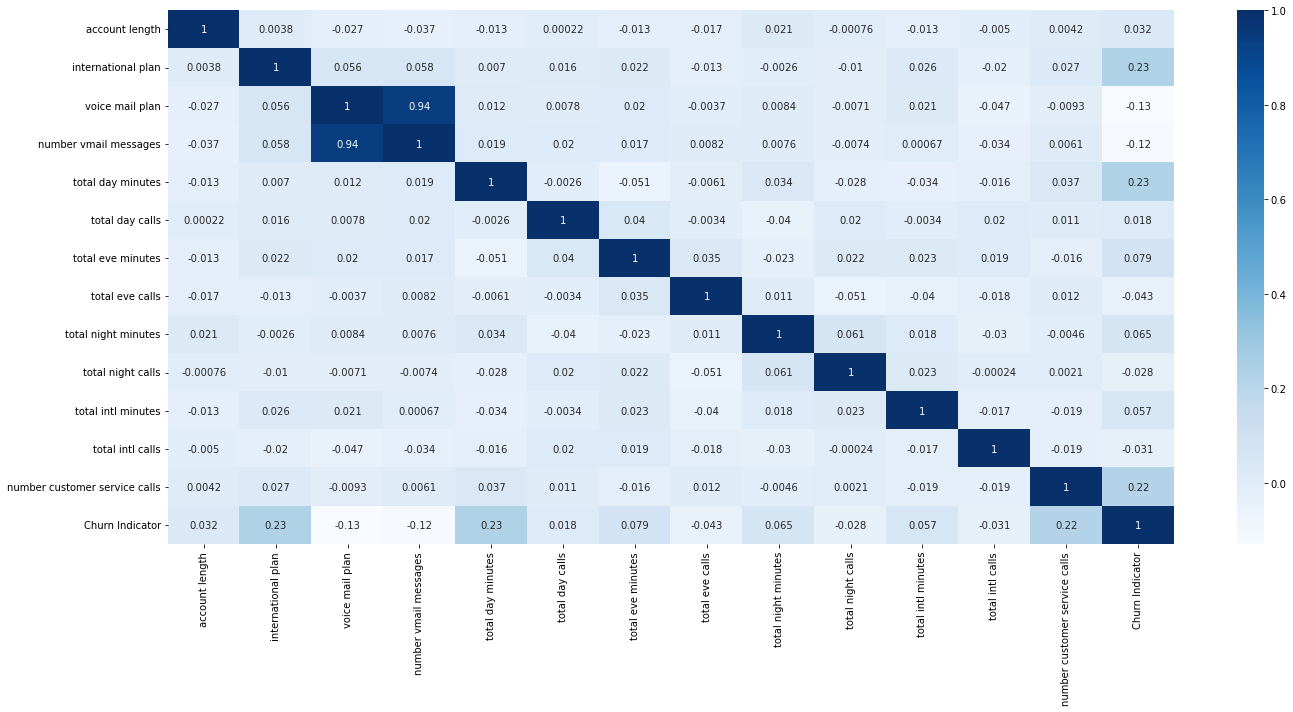

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),cbar=True,annot=True,cmap='Blues')
plt.tight_layout()
plt.show()

**Observation:**

**With regard to the heatmap we can see high correlation bettween the following variables:
With respect to churn
Total day minutes to Churn indicator at 0.23 and
Number customer service calls to Churn indicator at 0.22**

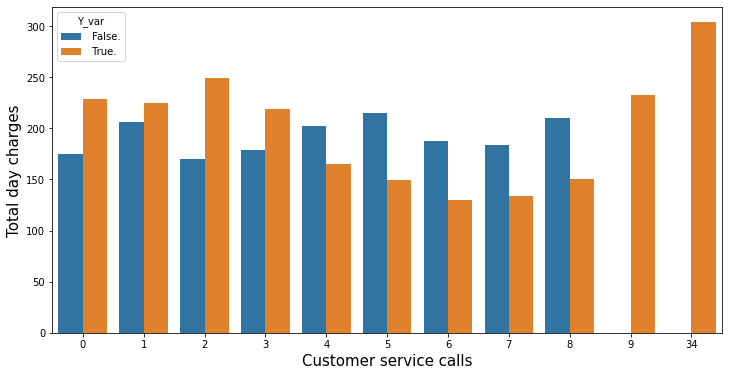

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(data = df, x = 'number customer service calls', y = 'total day minutes', hue = 'Y_var', ci = False)
plt.xlabel('Customer service calls', fontsize = 15)
plt.ylabel('Total day charges', fontsize = 15)
plt.show()


**IV. We can see that if customer service calls are made more than 7 times, then the service is bound to be cancelled. This also comes with high charges imposed on the user.
At the same time we can see that many users leave the service over 1 to 3 calls made to the customer service when are charged more. Analysis of the total day charge to the minutes spoken over churn rate could give us a better understanding of the same.**